In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Change directory
os.chdir(os.path.expanduser('~/Desktop/HLTH 453/A3'))

# Load the data
df = pd.read_csv('owid-co2-data.csv')

# Let's inspect it
print(df.head())
print(df.columns)

print(df.columns.tolist())

# plt.plot(x,y)
# plt.xlabel("")
# plt.ylabel("")
# plt.title("")
# plt.show()


       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                   NaN   

## Line Graph

country  Afghanistan    Africa  Albania  Algeria  Andorra   Angola  \
year                                                                 
1850           7.436   305.593    1.399    2.600    0.035    6.954   
1851           7.500   335.429    1.421    2.563    0.033    6.654   
1852           7.560   350.851    1.448    2.546    0.033    6.460   
1853           7.620   346.018    1.467    2.546    0.032    6.276   
1854           7.678   362.942    1.480    2.549    0.031    6.262   
...              ...       ...      ...      ...      ...      ...   
2019          39.145  4668.679    8.669  280.463    0.613  186.867   
2020          37.833  4465.167    8.120  264.184    0.499  175.331   
2021          38.313  4604.309    8.267  283.354    0.530  176.394   
2022          39.485  4654.375    8.114  290.326    0.530  175.148   
2023          40.081  4661.945    7.673  282.645    0.534  174.713   

country  Antigua and Barbuda  Argentina  Armenia       Asia  ...  \
year                 

Text(0.5, 1.0, 'Global GHG Emissions')

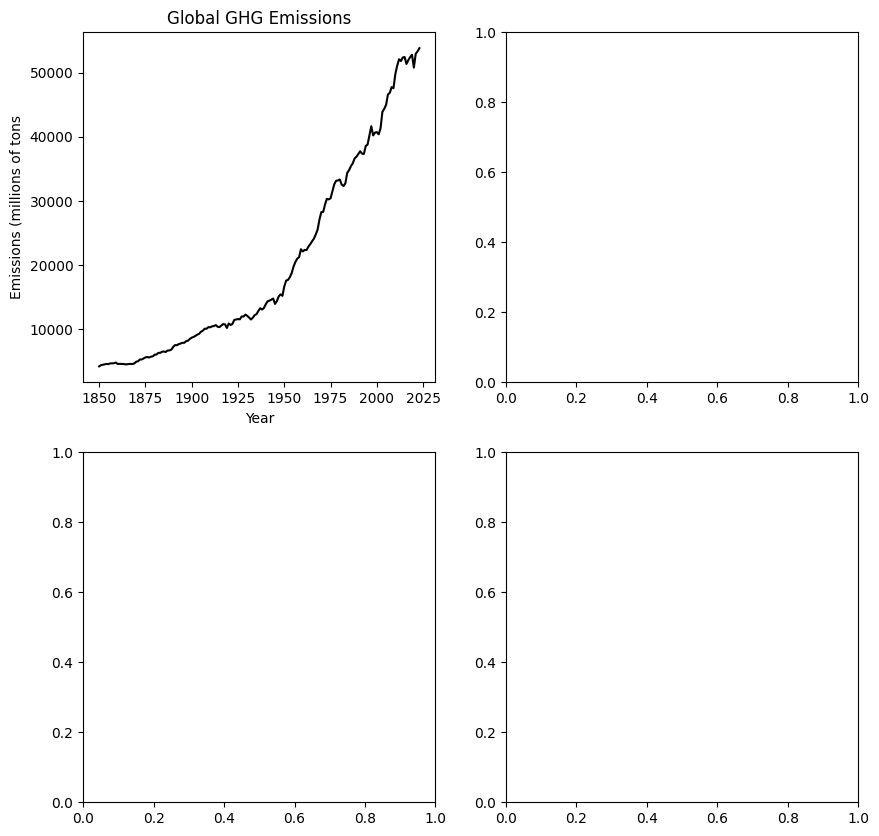

In [48]:
df_pivoted = df.pivot_table( index = 'year', columns = 'country', values = 'total_ghg') 
print(df_pivoted)

#set up a subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#dataframe[condition] = it's like a if statement, give me the rows where condition is true
#it's a series (list of pairs, year + world values)
world_data = df_pivoted['World']
clean_world_data = world_data[(world_data > 0) & (world_data.notna())]
#i don't get the &
#creates a 2x2 axes for plotting, country year combination
axes[0,0].plot(clean_world_data.index, clean_world_data, color = 'black')

# print('World' in df_pivoted.columns)
# print(df_pivoted.columns.tolist())

axes[0,0].set_xlabel("Year")
axes[0,0].set_ylabel("Emissions (millions of tons")
axes[0,0].set_title("Global GHG Emissions")


## Line Graph

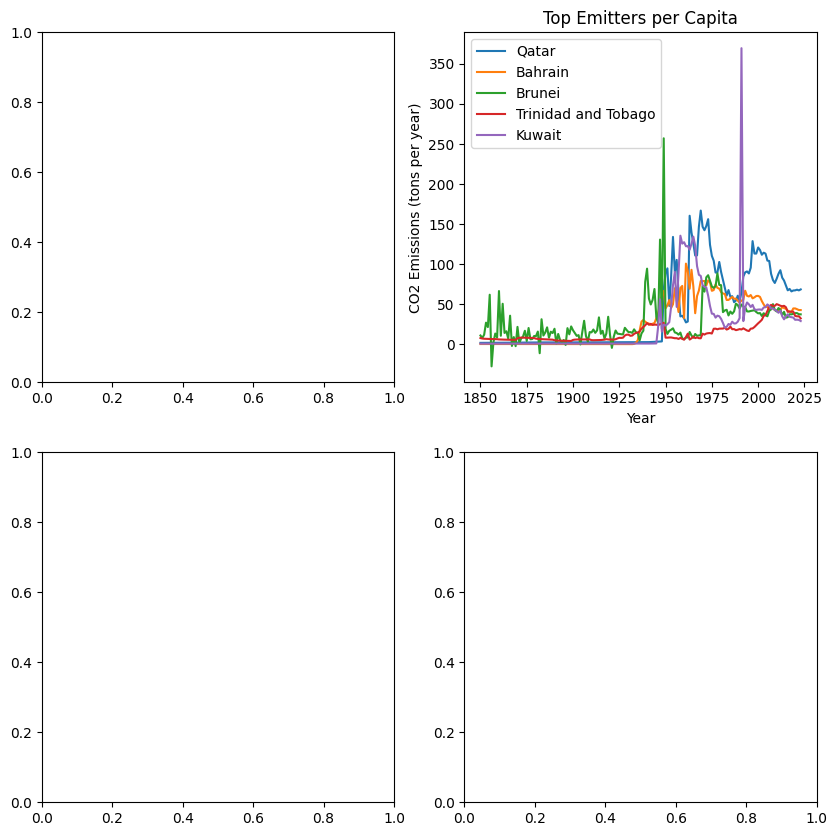

In [49]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

df_pivoted_per_capita = df.pivot_table( index = 'year', columns = 'country', values = 'ghg_per_capita') 

#ffill() = fills missing values with the last valid before it, save it back to the same varaible
df_pivoted_per_capita = df_pivoted_per_capita.ffill()

## .loc[2023] locates the row where index = 2023, returns all country values for that year
row_2023 = df_pivoted_per_capita.loc[2023]
sort_2023 = row_2023.sort_values(ascending = False) 
top_five = sort_2023[:5] # gives u a series of top 5 country and their 2023 values 
top_five_countries = top_five.index.tolist() # converts the index (names of countries) => list

#now have top 5 countries, do time series for each 5
for country in top_five_countries:
    axes[0,1].plot(df_pivoted_per_capita.index,  # All years (x-axis)
                   df_pivoted_per_capita[country],
                   label = country)  # That country's values (y-axis)

axes[0,1].set_xlabel("Year")
axes[0,1].set_ylabel("CO2 Emissions (tons per year)")
axes[0,1].set_title("Top Emitters per Capita")
axes[0,1].legend(top_five_countries)
plt.show()

# i dont understand .plot vs .plt


## Bar Graph

/var/folders/zy/0lspcqbs11b7jbxn_0w8d2s40000gn/T/ipykernel_78925/2825714159.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_region_filtered = df_region_filtered.ffill()


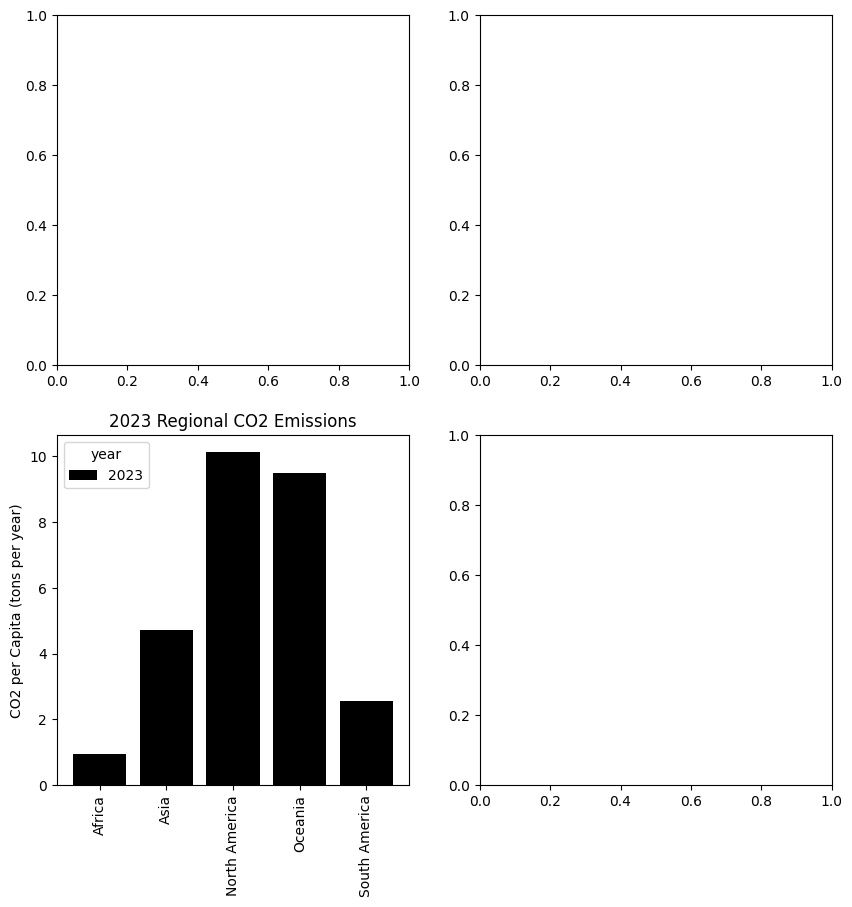

In [50]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
regions = ['Africa','Asia', 'Oceania', 'North America', 'South America']
df_region_filtered = df[(df['year'] == 2023) & (df['country'].isin(regions))]
df_region_filtered = df_region_filtered.ffill()

df_region_filtered['country'] = pd.Categorical(
    df_region_filtered['country'], 
    categories=regions, 
    ordered=True
)

axes[1,0].bar(df_region_filtered['country'], df_region_filtered['co2_per_capita'],
               color = 'black',label = '2023')
axes[1,0].set_xlabel("")
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,0].set_ylabel("CO2 per Capita (tons per year)")
axes[1,0].set_title("2023 Regional CO2 Emissions")
axes[1,0].legend(title = 'year')


/var/folders/zy/0lspcqbs11b7jbxn_0w8d2s40000gn/T/ipykernel_78925/1256065465.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_region_filtered = df_region_filtered.ffill()


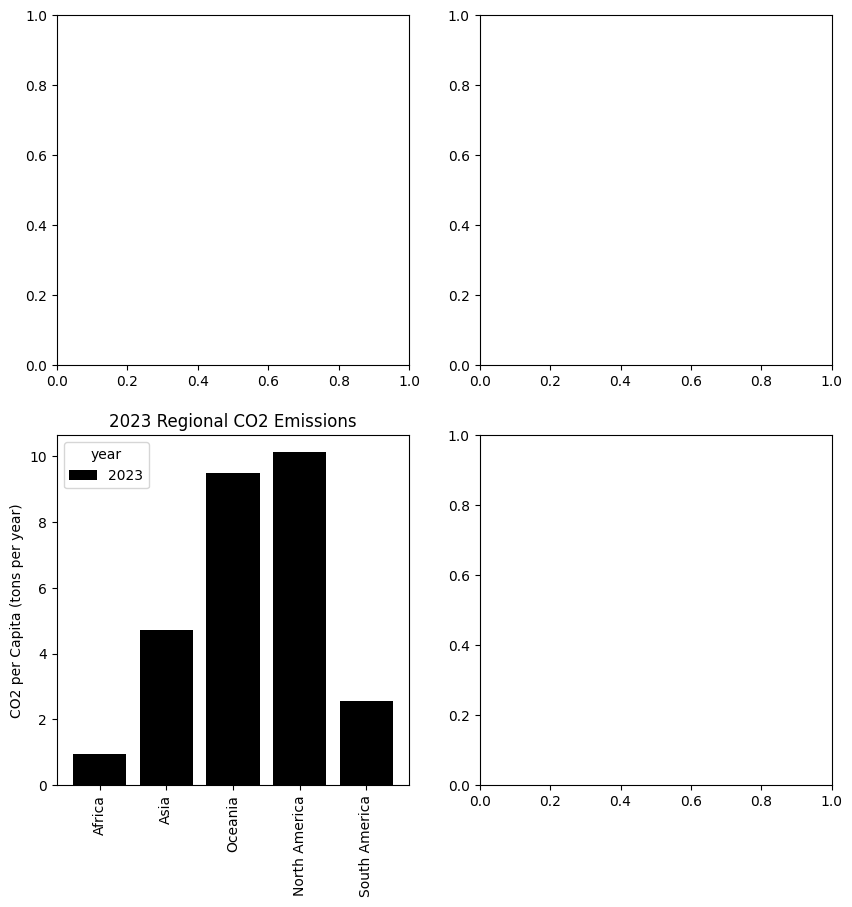

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
regions = ['Africa','Asia', 'Oceania', 'North America', 'South America']
df_region_filtered = df[(df['year'] == 2023) & (df['country'].isin(regions))]
df_region_filtered = df_region_filtered.ffill()

df_region_filtered['country'] = pd.Categorical(
    df_region_filtered['country'], 
    categories=regions, 
    ordered=True
)

df_region_filtered = df_region_filtered.sort_values('country')

axes[1,0].bar(df_region_filtered['country'], df_region_filtered['co2_per_capita'],
               color = 'black',label = '2023')
axes[1,0].set_xlabel("")
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,0].set_ylabel("CO2 per Capita (tons per year)")
axes[1,0].set_title("2023 Regional CO2 Emissions")
axes[1,0].legend(title = 'year')

## Histogram

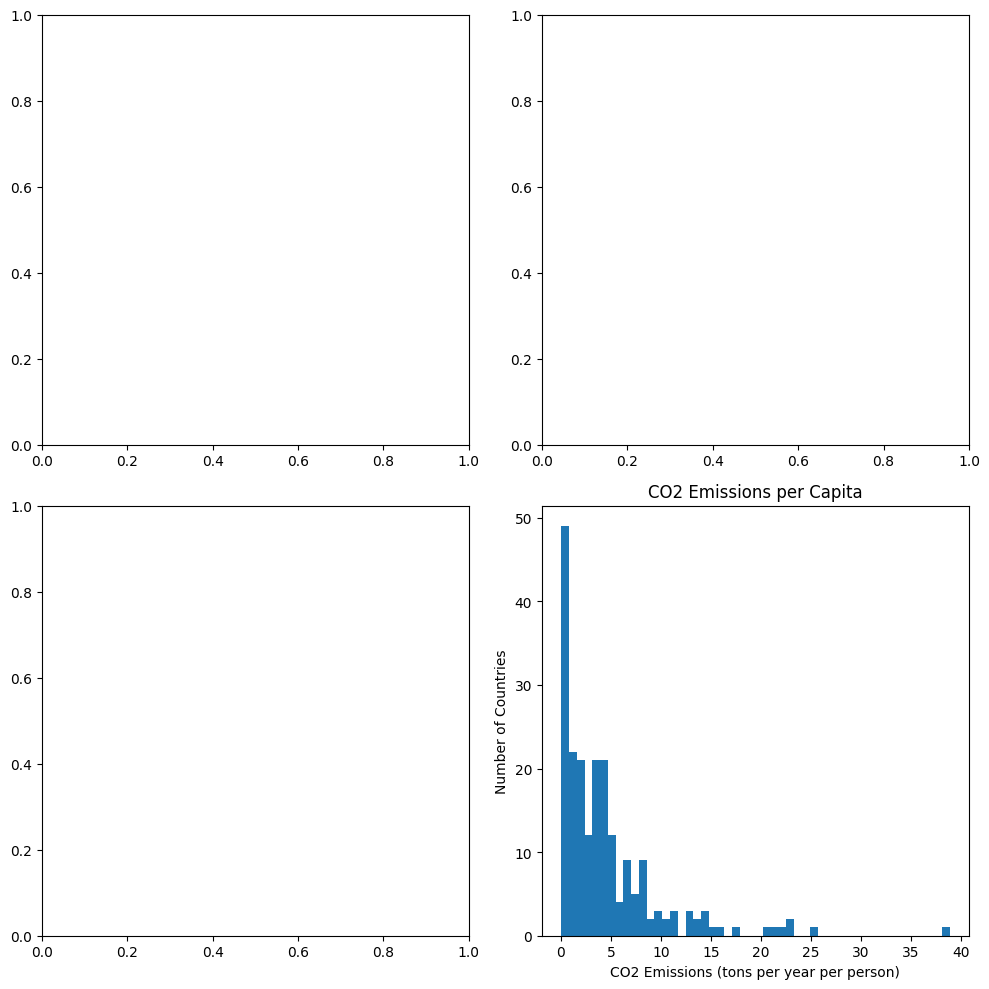

In [52]:
# Drop rows without iso_code first (these are regions or aggregates)
df = df.dropna(subset=['iso_code'])

# Pivot the table
df_co2_per_capita = df.pivot_table(index='year', columns='country', values='co2_per_capita')

# Forward fill missing values
df_co2_per_capita = df_co2_per_capita.ffill()

# Extract 2023 data
data_2023 = df_co2_per_capita.loc[2023].dropna()

# Set up a subplot (2x2 grid)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Bottom-right histogram
axes[1, 1].hist(data_2023, bins=50)

# Labels and title
axes[1, 1].set_xlabel("CO2 Emissions (tons per year per person)")
axes[1, 1].set_ylabel("Number of Countries")
axes[1, 1].set_title("CO2 Emissions per Capita")

plt.tight_layout()
plt.show()


In [53]:
df = df.dropna(subset=['iso_code'])
df_co2_per_capita = df.pivot_table( index = 'year', columns = 'country', values = 'co2_per_capita') 
df_co2_per_capita = df_co2_per_capita.ffill()
df_co2_per_capita = df_co2_per_capita.dropna(subset=['iso_code'])

print()

#set up a subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axes[1,1].hist(data_2023, bins = 50)
axes[1,1].set_xlabel("CO2 Emissions (tons per year per person)")
axes[1,1].set_ylabel("Number of Countries")
axes[1,1].set_title("CO2 Emissions per Capita")
plt.show()


KeyError: ['iso_code']